In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [146]:
ds_train=pd.read_csv('Aeroplane train.csv')
ds_test=pd.read_csv('Aeroplane test.csv')

In [147]:
ds_train.head(2)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128


In [148]:
ds_test.head(2)

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10


In [149]:
ds_train.shape


(10000, 12)

In [150]:
ds_test.shape

(2500, 11)

In [151]:
ds_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


In [152]:
ds_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,2500.0,41.825224,16.280187,0.000000,30.593607,41.461187,52.751142,100.000000
Days_Since_Inspection,2500.0,12.946400,3.523364,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,2500.0,6.574800,7.179542,0.000000,1.000000,4.000000,9.000000,54.000000
Control_Metric,2500.0,65.368058,11.442005,20.966272,57.702826,66.066545,73.119872,97.994531
Turbulence_In_gforces,2500.0,0.376197,0.116960,0.143376,0.292583,0.357404,0.441699,0.881926
Cabin_Temperature,2500.0,79.993068,2.713833,74.740000,77.930000,79.600000,81.530000,94.200000
Accident_Type_Code,2500.0,3.853600,1.877652,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,2500.0,32383.134179,9485.096436,831.695553,26008.851717,32472.865497,38759.519071,62315.408444
Violations,2500.0,1.990800,1.018592,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,2500.0,0.250886,0.387663,0.000368,0.013136,0.072466,0.315407,2.365378


In [153]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               10000 non-null float64
Days_Since_Inspection      10000 non-null int64
Total_Safety_Complaints    10000 non-null int64
Control_Metric             10000 non-null float64
Turbulence_In_gforces      10000 non-null float64
Cabin_Temperature          10000 non-null float64
Accident_Type_Code         10000 non-null int64
Max_Elevation              10000 non-null float64
Violations                 10000 non-null int64
Adverse_Weather_Metric     10000 non-null float64
Accident_ID                10000 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


In [154]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
Safety_Score               2500 non-null float64
Days_Since_Inspection      2500 non-null int64
Total_Safety_Complaints    2500 non-null int64
Control_Metric             2500 non-null float64
Turbulence_In_gforces      2500 non-null float64
Cabin_Temperature          2500 non-null float64
Accident_Type_Code         2500 non-null int64
Max_Elevation              2500 non-null float64
Violations                 2500 non-null int64
Adverse_Weather_Metric     2500 non-null float64
Accident_ID                2500 non-null int64
dtypes: float64(6), int64(5)
memory usage: 215.0 KB


In [155]:
ds_train['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [156]:
ds_train.isna().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [157]:
ds_test.isna().sum()

Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [158]:
ds_train.dtypes

Severity                    object
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
Accident_ID                  int64
dtype: object

In [159]:
ds_train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [160]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# ds_train['Severity']=le.fit_transform(ds_train['Severity']) 

Points with class label -> 'Highly fatal and damaging' are =  30.490000000000002 %
Points with class label -> 'Significant damage and serious injuries' are =  27.29 %
Points with class label -> 'Minor damage and injuries' are =  25.27 %
Points with class label -> 'Significant damage and fatalities' are =  16.950000000000003 %


([<matplotlib.patches.Wedge at 0x1f5aed1a2e8>,
 [Text(0.6327885049635631, 0.8997659184398901, 'Highly fatal and damaging'),
  Text(-1.0261520927877268, 0.39624724916063275, 'Significant damage and serious injuries'),
  Text(-0.31252728464569235, -1.0546689984786652, 'Minor damage and injuries'),
  Text(0.9476946595353, -0.5584575474360357, 'Significant damage and fatalities')],
 [Text(0.34515736634376165, 0.4907814100581218, '30.5%'),
  Text(-0.5597193233387601, 0.21613486317852693, '27.3%'),
  Text(-0.17046942798855946, -0.575273999170181, '25.3%'),
  Text(0.5169243597465272, -0.30461320769238304, '17.0%')])

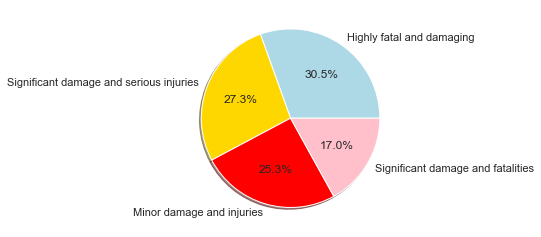

In [161]:
class_label = ds_train['Severity'].value_counts()
total_points = len(ds_train)
print("Points with class label -> 'Highly fatal and damaging' are = ",class_label.values[0]/total_points*
100,"%")
print("Points with class label -> 'Significant damage and serious injuries' are = ",class_label.values[1]/total_points*
100,"%")
print("Points with class label -> 'Minor damage and injuries' are = ",class_label.values[2]/total_points*
100,"%")
print("Points with class label -> 'Significant damage and fatalities' are = ",class_label.values[3]/total_points*
100,"%")
labels = ['Highly fatal and damaging','Significant damage and serious injuries','Minor damage and injuries','Significant damage and fatalities']
sizes = [30.490000000000002,27.29,25.27,16.950000000000003]
colors = ['lightblue', 'gold','red','pink']
plt.figure(figsize=(4,5))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)

<Figure size 360x288 with 0 Axes>

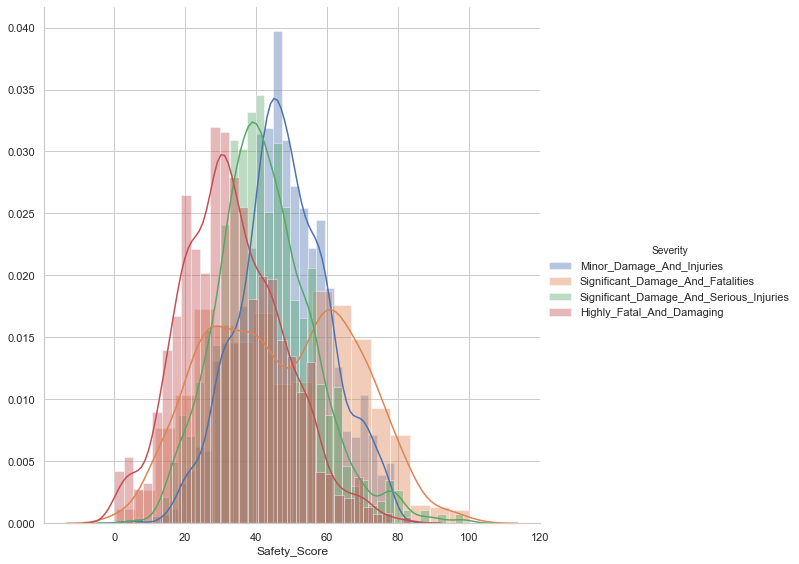

In [162]:
plt.figure(figsize=(5,4))
sns.FacetGrid(ds_train, hue="Severity",height=8).map(sns.distplot, "Safety_Score").add_legend()

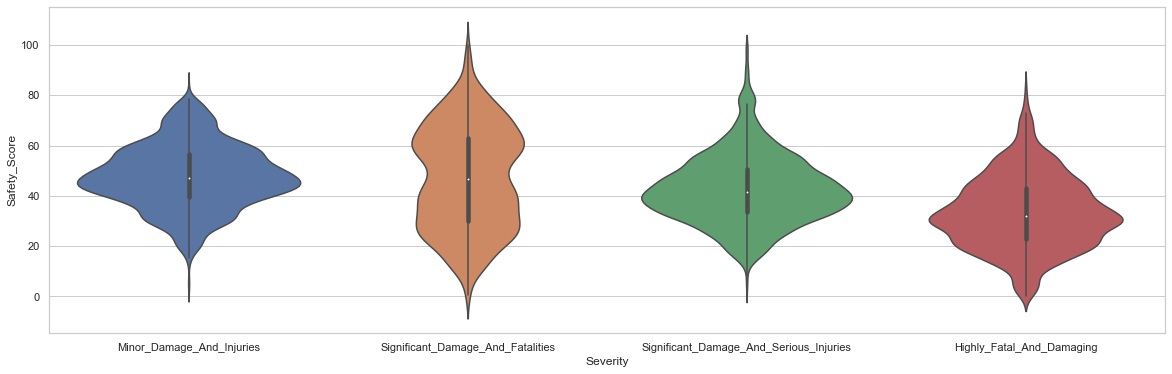

In [163]:
plt.figure(figsize=(20,6))
sns.violinplot(data=ds_train,x = 'Severity', y = 'Safety_Score')

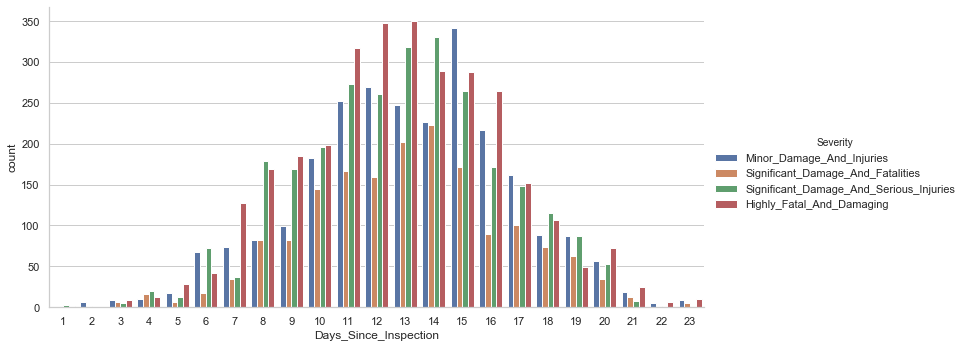

In [164]:
sns.catplot(x="Days_Since_Inspection",hue="Severity", kind="count", data=ds_train,aspect=2)

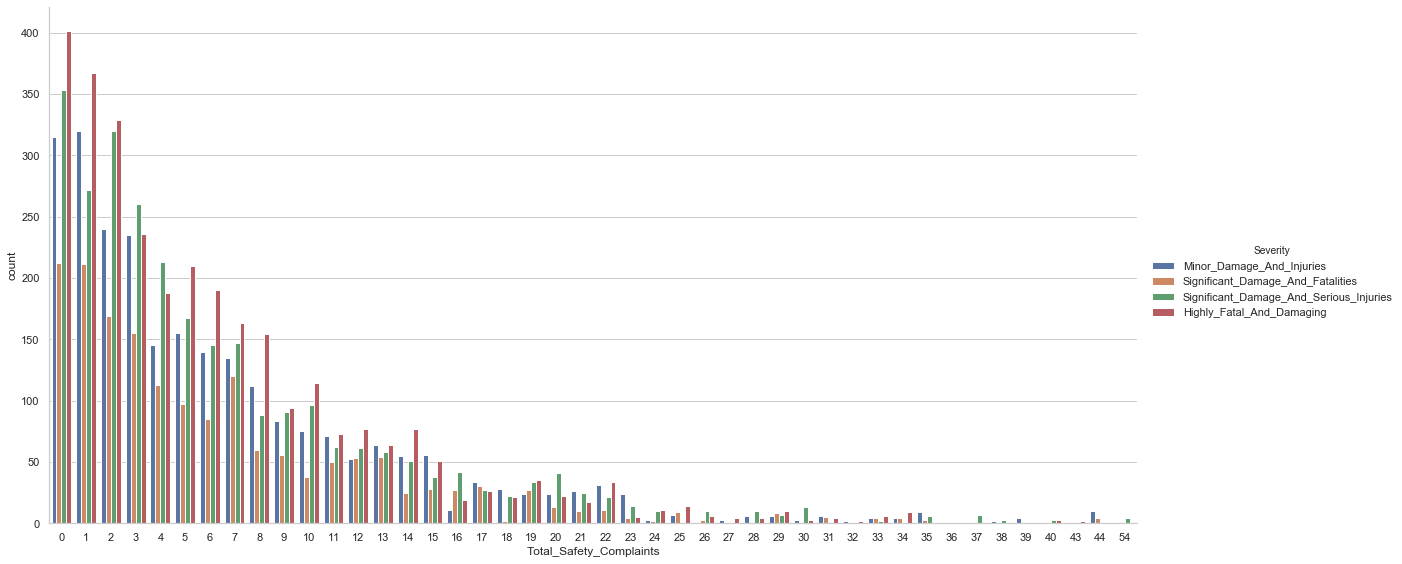

In [165]:
sns.catplot(x="Total_Safety_Complaints",hue="Severity", kind="count", data=ds_train,aspect=2,height=8)

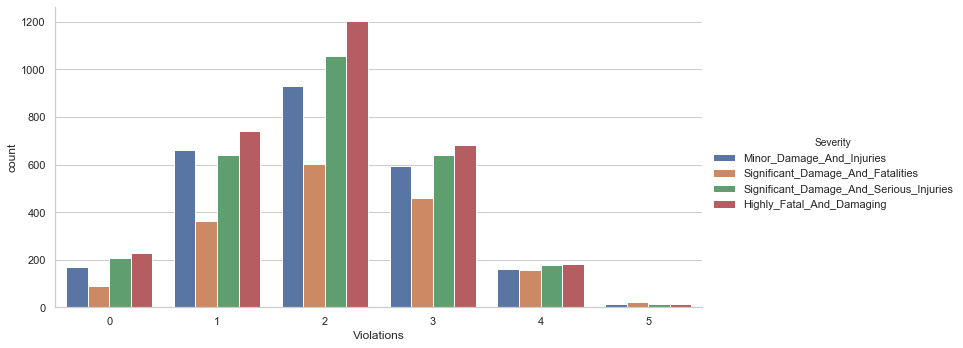

In [166]:
sns.catplot(x="Violations",hue="Severity", kind="count", data=ds_train,aspect=2)

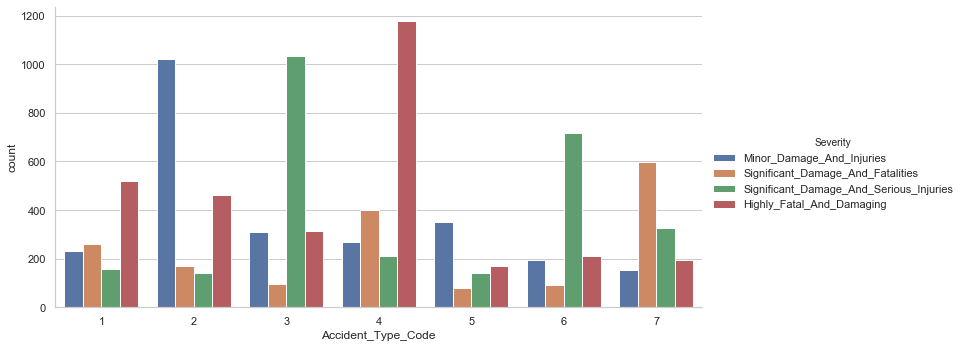

In [167]:
sns.catplot(x="Accident_Type_Code",hue="Severity", kind="count", data=ds_train,aspect=2)

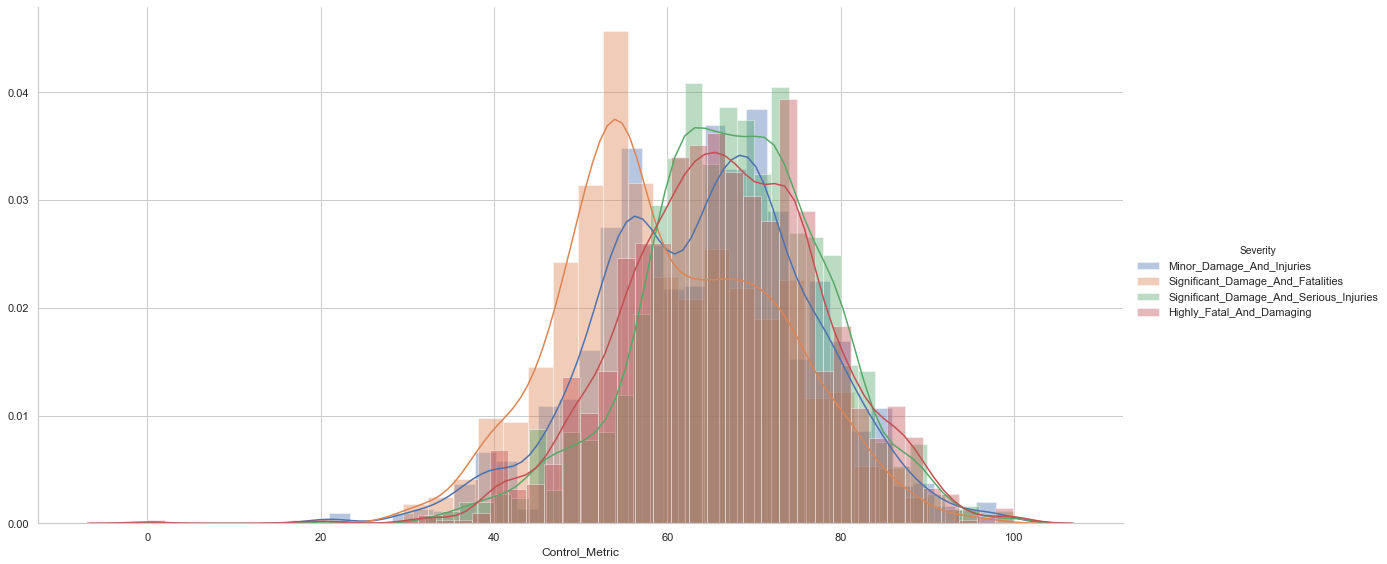

In [168]:
sns.FacetGrid(ds_train, hue="Severity",height=8,aspect=2).map(sns.distplot, "Control_Metric").add_legend()

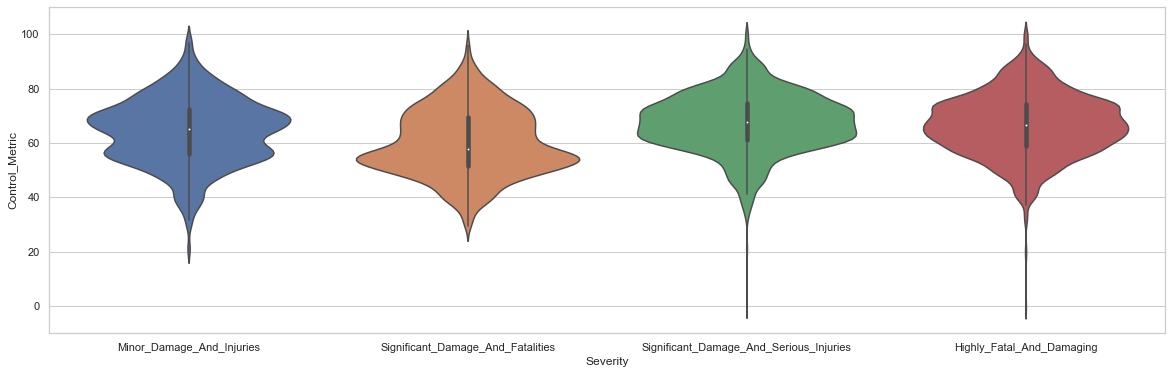

In [169]:
plt.figure(figsize=(20,6))
sns.violinplot(data=ds_train,x = 'Severity', y = 'Control_Metric')

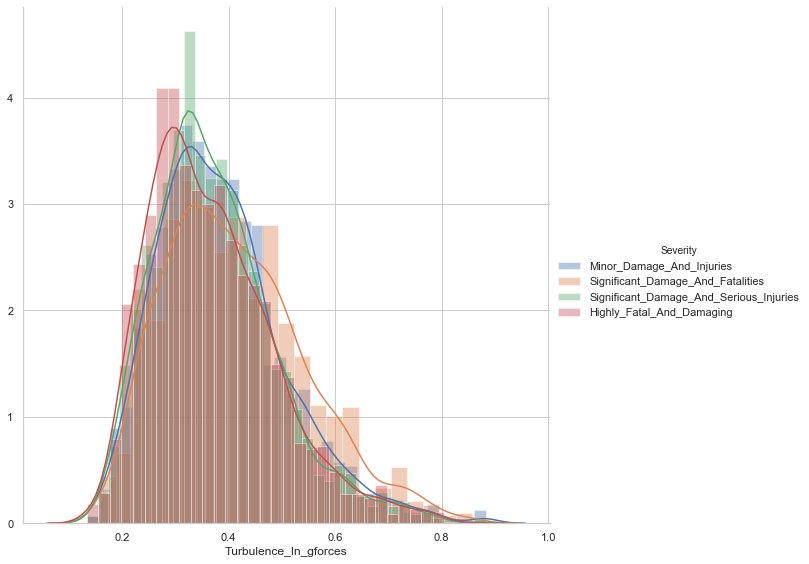

In [170]:
sns.FacetGrid(ds_train, hue="Severity",height=8).map(sns.distplot, "Turbulence_In_gforces").add_legend()

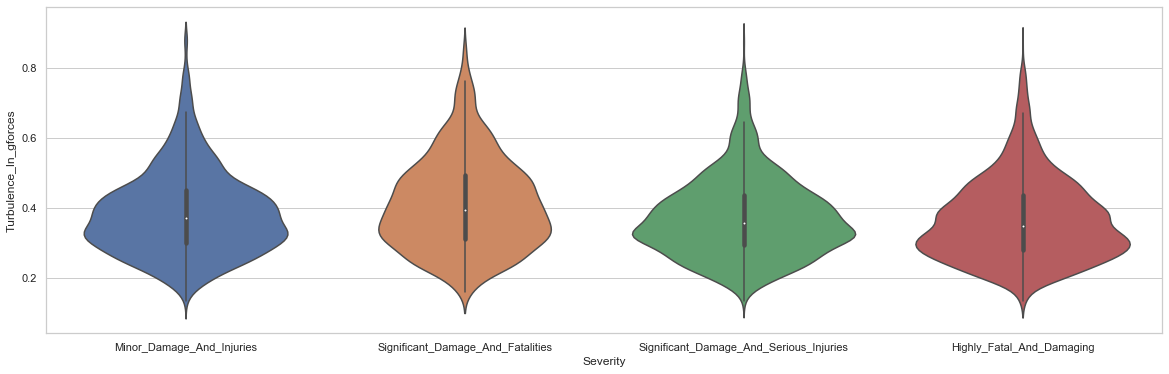

In [171]:
plt.figure(figsize=(20,6))
sns.violinplot(data=ds_train,x = 'Severity', y = 'Turbulence_In_gforces')

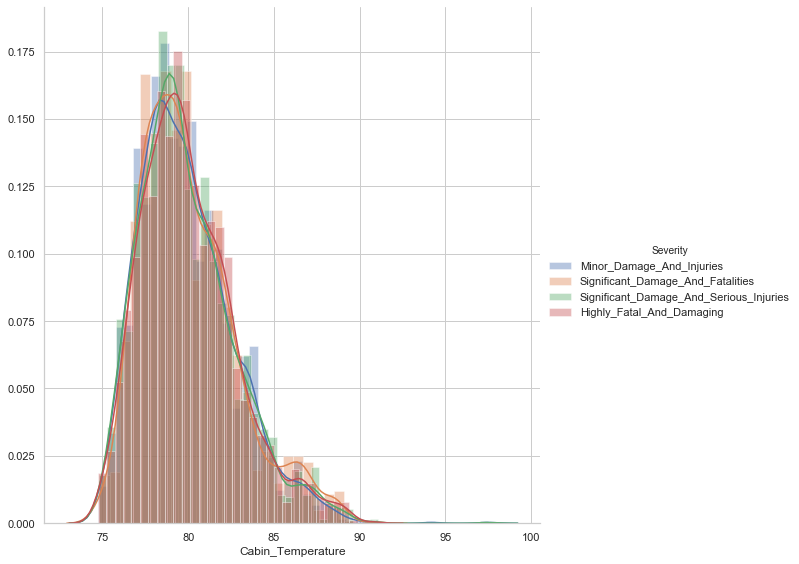

In [172]:
sns.FacetGrid(ds_train, hue="Severity",height=8).map(sns.distplot, "Cabin_Temperature").add_legend()

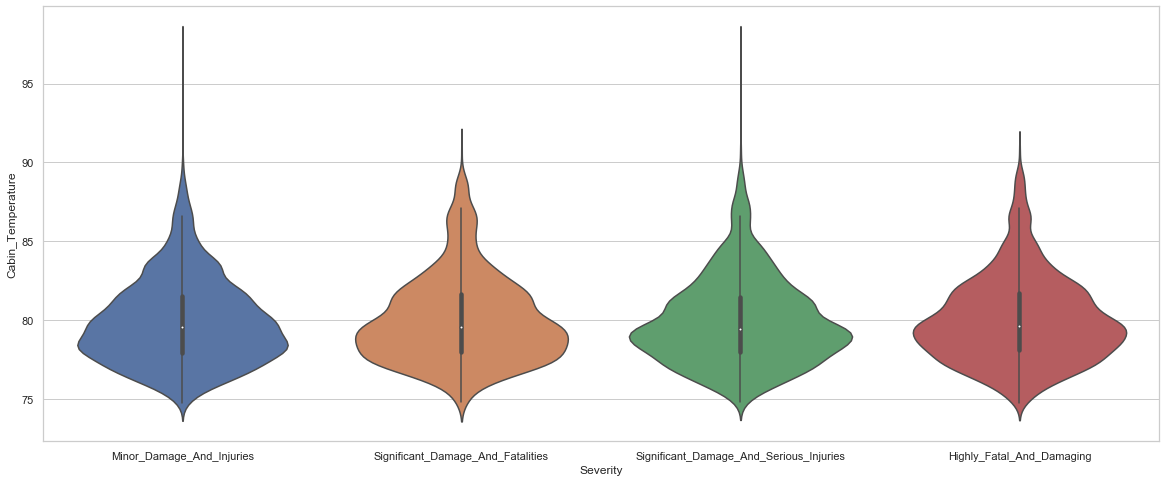

In [173]:
plt.figure(figsize=(20,8))
sns.violinplot(data=ds_train,x = 'Severity', y = 'Cabin_Temperature')

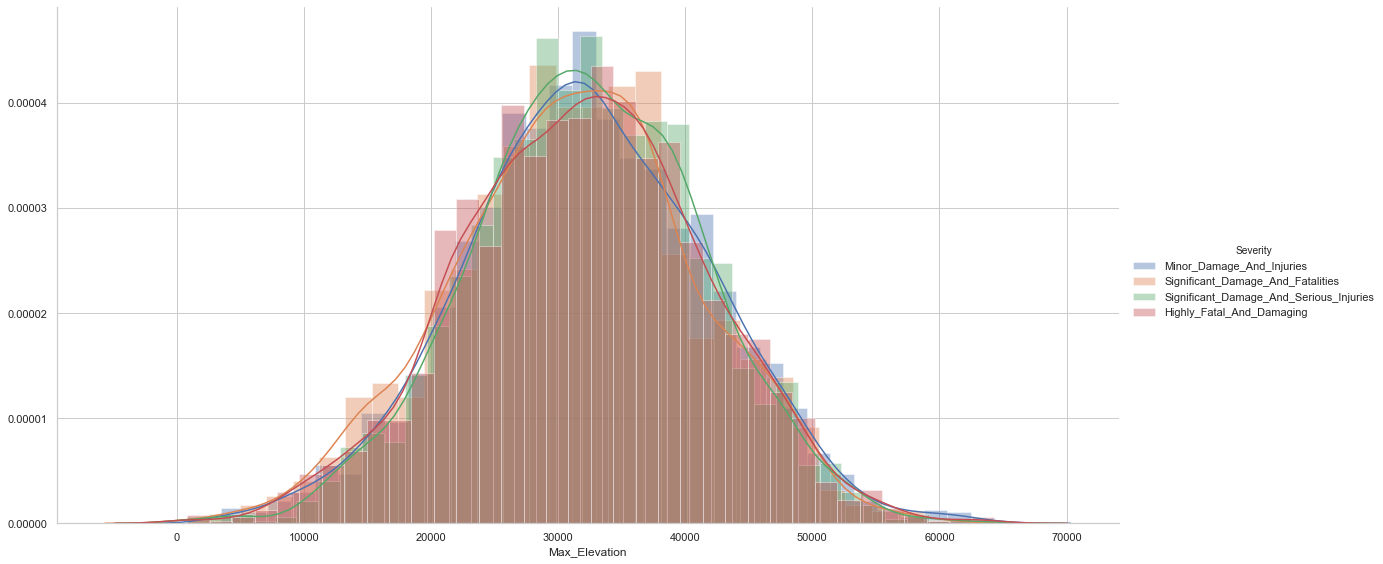

In [174]:
sns.FacetGrid(ds_train, hue="Severity",height=8,aspect=2).map(sns.distplot, "Max_Elevation").add_legend()

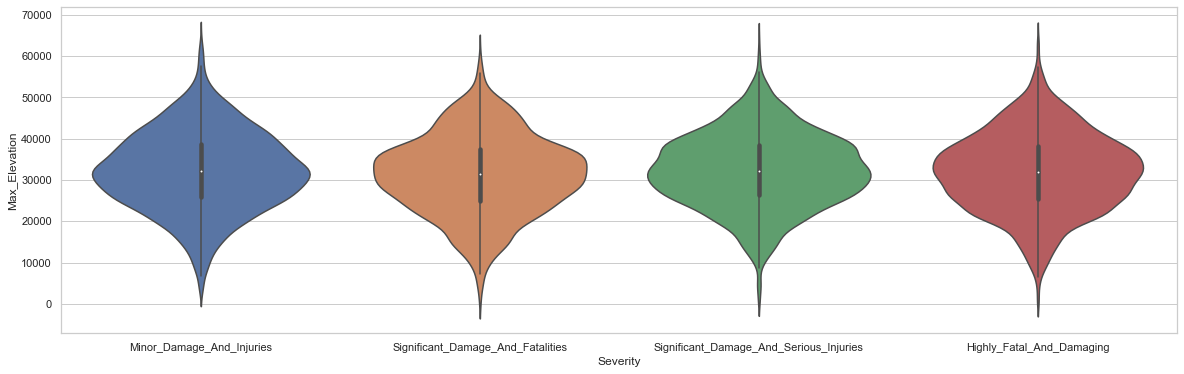

In [175]:
plt.figure(figsize=(20,6))
sns.violinplot(data=ds_train,x = 'Severity', y = 'Max_Elevation')

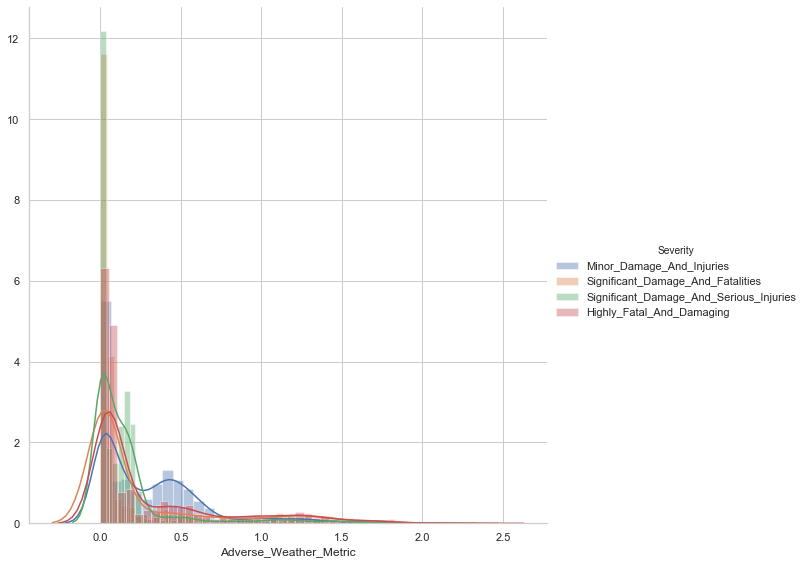

In [176]:
sns.FacetGrid(ds_train, hue="Severity",height=8).map(sns.distplot, "Adverse_Weather_Metric").add_legend()

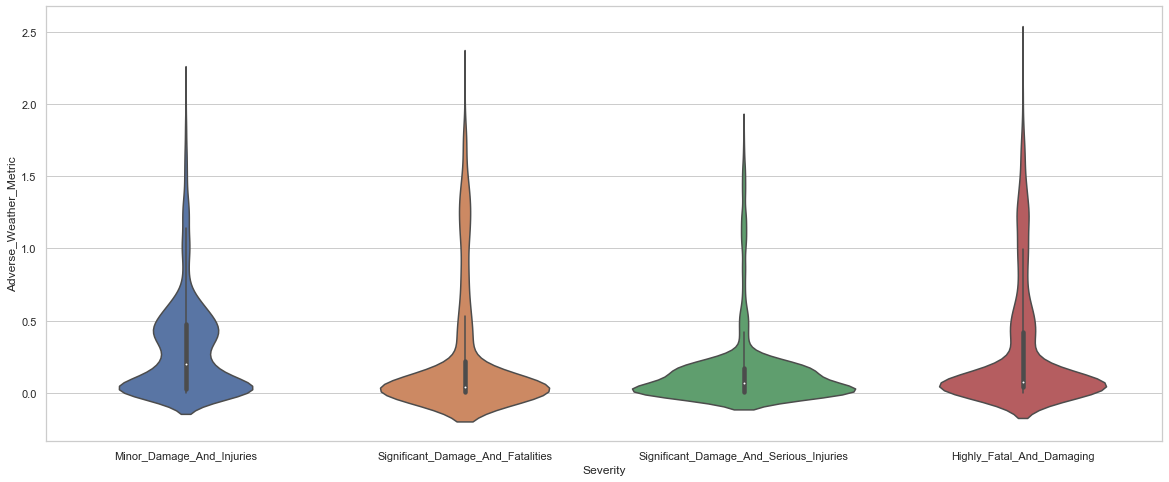

In [177]:
plt.figure(figsize=(20,8))
sns.violinplot(data=ds_train,x = 'Severity', y = 'Adverse_Weather_Metric')

In [178]:
continuous_feature=ds_train[['Safety_Score','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation','Adverse_Weather_Metric']]
continuous_feature.shape

(10000, 6)

In [179]:
ds_train.shape

(10000, 12)

In [180]:
ds_train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

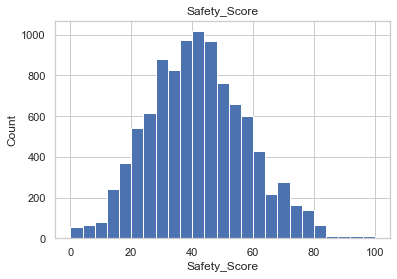

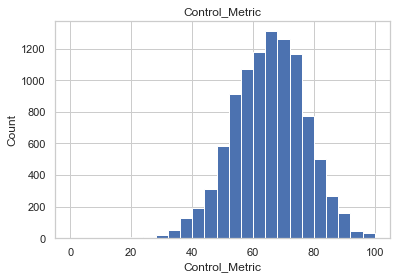

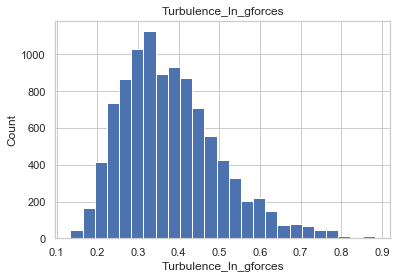

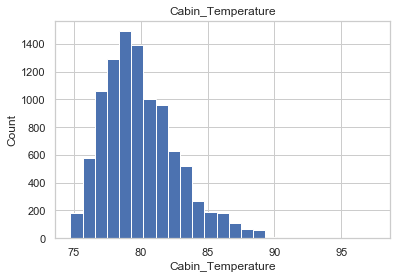

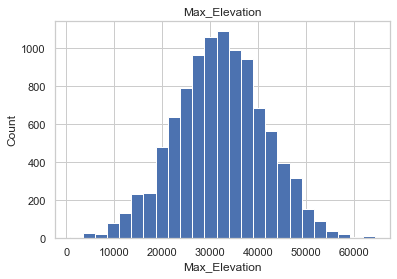

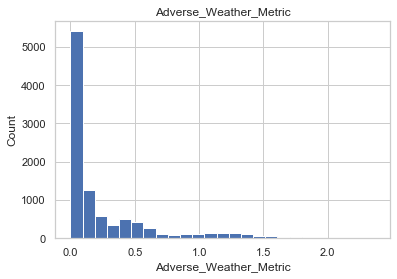

In [181]:
data_1=continuous_feature.copy()
for feature in continuous_feature:
    data_1=continuous_feature.copy()
    data_1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [182]:
# data_2=continuous_feature.copy()
# for feature in continuous_feature:
#     data_2[feature]=np.log(data_2[feature])
#     print(data_2[feature].max())
#     print(data_2[feature].min())
#     data_2[feature]=data_2[np.isfinite(data_2[feature])]
#     data_2[feature].hist(bins=25)
#     print(data_2[feature].shape)
#     plt.xlabel(feature)
#     plt.ylabel('count')
#     plt.title(feature)
#     plt.show()

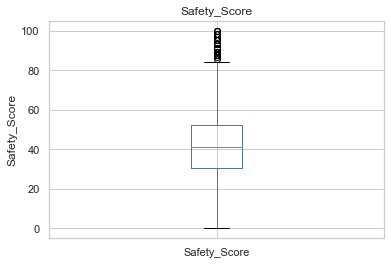

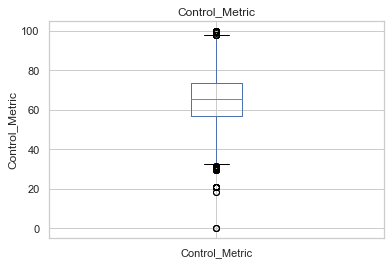

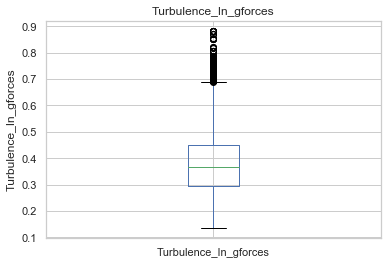

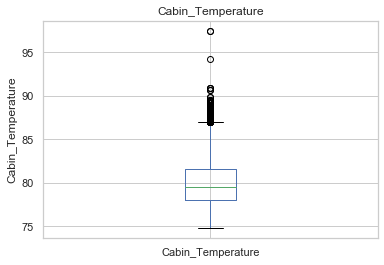

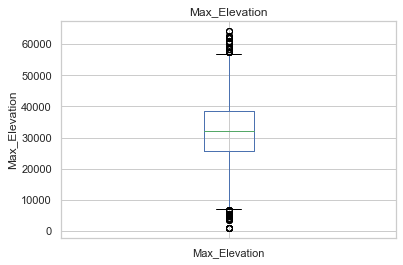

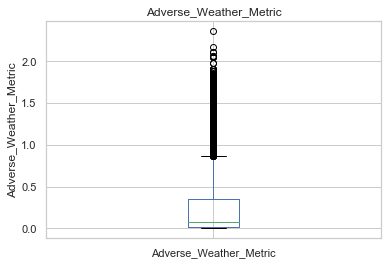

In [183]:
for feature in data_1:
    data=data_1.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [184]:
# df=data_1
# df

In [185]:
ds_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Significant_Damage_And_Serious_Injuries,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,Highly_Fatal_And_Damaging,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,Significant_Damage_And_Serious_Injuries,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,Minor_Damage_And_Injuries,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [186]:
ds_train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [187]:
# ds_check=ds_train
# ds_check=ds_train.copy().drop(columns=['Accident_ID'])
# ds_check.head()

In [188]:

# df['Severity']=ds_train['Severity']
# df['Days_Since_Inspection']=ds_train['Days_Since_Inspection']
# df['Accident_Type_Code']=ds_train['Accident_Type_Code']
# df['Violations']=ds_train['Violations']
# df['Total_Safety_Complaints']=ds_train['Total_Safety_Complaints']

In [189]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# df['Severity']=le.fit_transform(df['Severity']) 
ds_train['Severity']=le.fit_transform(ds_train['Severity']) 


In [190]:
# ds_train.groupby('Safety_Score')['Severity'].plot()
# plt.xlabel('Safety_Score')
# plt.ylabel('Severity')
# plt.title("Severity vs Safety_Score")

In [191]:
ds_train

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,0,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,3,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [192]:
# sns.pairplot(ds_train, hue = 'Severity')

In [193]:
# sns.pairplot(ds_train)

In [194]:
# sns.pairplot(df)

In [195]:
# df_z=df
# df
df_z=ds_train

In [196]:
from scipy import stats
z = np.abs(stats.zscore(df_z))
print(z)

[[0.34715249 0.45530256 0.30198105 ... 0.94987305 0.44270091 0.36106634]
 [0.34715249 1.2758883  0.82808182 ... 0.01173158 0.25377304 1.6236738 ]
 [0.49873564 1.31267317 0.01946533 ... 0.94987305 0.66193896 1.13173567]
 ...
 [1.34462377 0.86895304 1.1495282  ... 0.94987305 0.22949275 1.56636294]
 [0.34715249 0.88823228 1.39311325 ... 0.01173158 0.60154411 0.36109637]
 [1.19304061 0.50340586 0.01946533 ... 0.01173158 0.62606475 0.86439187]]


In [197]:
threshold = 3
print(np.where(z > 3))

(array([   8,   23,   26,   34,   36,   49,   58,   71,   92,  106,  106,
        126,  156,  156,  166,  170,  171,  183,  184,  187,  190,  191,
        191,  201,  201,  226,  231,  294,  320,  328,  345,  377,  378,
        408,  441,  450,  451,  487,  494,  496,  499,  504,  514,  526,
        548,  572,  572,  586,  599,  603,  635,  658,  673,  677,  680,
        680,  686,  700,  727,  729,  736,  747,  755,  757,  763,  776,
        786,  789,  801,  803,  832,  833,  836,  840,  849,  851,  886,
        887,  893,  905,  920,  949,  949,  964,  968,  969,  986,  999,
       1031, 1036, 1068, 1068, 1068, 1072, 1078, 1099, 1107, 1107, 1108,
       1109, 1131, 1141, 1148, 1163, 1170, 1180, 1199, 1216, 1233, 1238,
       1241, 1247, 1251, 1253, 1268, 1275, 1311, 1323, 1351, 1367, 1377,
       1406, 1450, 1459, 1467, 1495, 1504, 1510, 1536, 1561, 1584, 1603,
       1605, 1657, 1668, 1669, 1675, 1680, 1701, 1730, 1747, 1752, 1805,
       1837, 1848, 1872, 1886, 1892, 1901, 1910, 1

In [198]:
df_z= df_z[(z < 3).all(axis=1)]

In [199]:
df_z


,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,0,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,3,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [200]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [201]:
# df2=df[~((df < (Q1 -1.5* IQR)) |(df > (Q3 + 1.5* IQR))).any(axis=1)]

In [202]:
df_z.shape

(9323, 12)

In [203]:
continuous_feature_test=ds_test[['Safety_Score','Control_Metric','Turbulence_In_gforces','Cabin_Temperature','Max_Elevation','Adverse_Weather_Metric']]
continuous_feature_test.shape

(2500, 6)

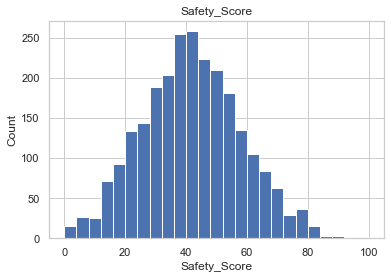

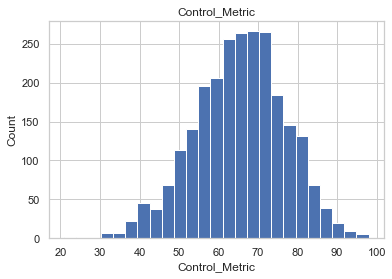

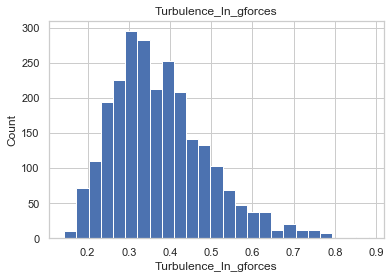

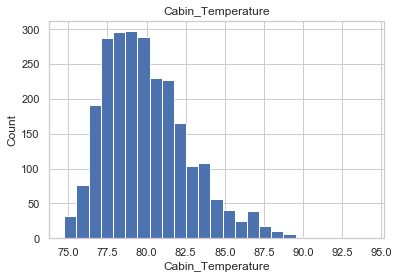

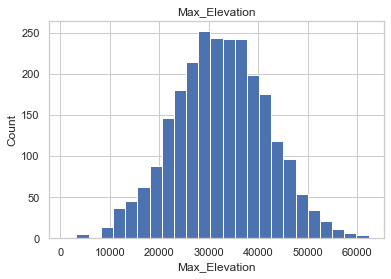

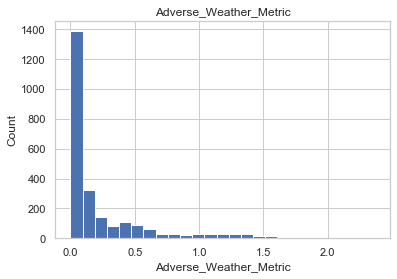

In [204]:
data_test_1=continuous_feature_test.copy()
for feature in continuous_feature_test:
    data_test_1[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [205]:
# data_test_2=continuous_feature_test.copy()
# for feature in continuous_feature_test:
#     data_test_2[feature]=np.log(data_test_2[feature])
#     print(data_test_2[feature].max())
#     print(data_test_2[feature].min())
#     data_test_2[feature]=data_test_2[np.isfinite(data_test_2[feature])]
#     data_test_2[feature].hist(bins=25)
#     print(data_test_2[feature].shape)
#     plt.xlabel(feature)
#     plt.ylabel('count')
#     plt.title(feature)
#     plt.show()

In [206]:
df2=df_z
df2.shape

(9323, 12)

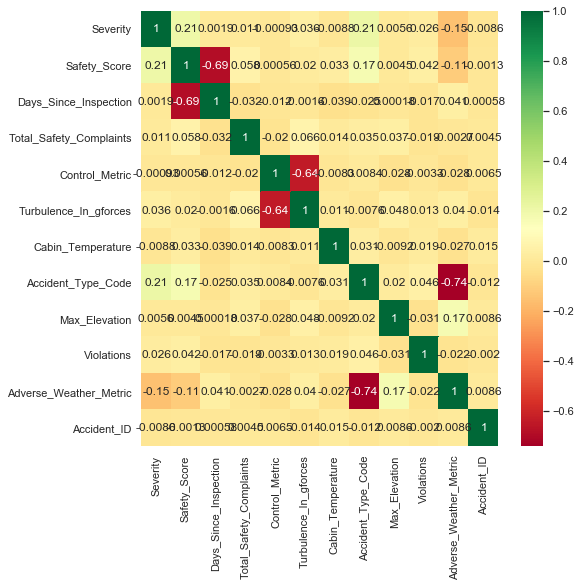

In [207]:
import seaborn as sns
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
g=sns.heatmap(ds_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [208]:
ds_train.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')


# safety_score - Days_Since_Inspection         -0.69

# we can understand that safety_score and Days_Since_Inspection  are negatively corelated
# i.e As no of days since inspection increases safety score decreases ,chances of higher severity increases


# Control_Metric -  Turbulence_In_gforces          -0.64

# we can understand that turbulence and control metric are negatively corelated
# i.e As the turbulence increases the control of pilot on the plane decreases.(Which is obvious!)

# Adverse_Weather_Metric- Accident_Type_Code       -0.74





In [209]:
df2.columns


Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [210]:
ds_test.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [211]:
# data_test_2

In [212]:
# df_test=data_test_2
# df_test['Days_Since_Inspection']=ds_test['Days_Since_Inspection']
# df_test['Accident_Type_Code']=ds_test['Accident_Type_Code']
# df_test['Violations']=ds_test['Violations']
# df_test['Total_Safety_Complaints']=ds_test['Total_Safety_Complaints']

In [213]:
# df_test

In [214]:
df2

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,56.118721,8,1,63.445761,0.482359,78.64,5,38537.363408,2,0.026150,11493
9996,0,40.365297,10,7,62.169553,0.421775,79.77,4,40846.916900,2,0.074898,305
9997,3,27.853881,17,1,69.598906,0.318277,80.37,3,33771.996300,3,0.168173,612
9998,1,56.210046,8,0,39.835916,0.598118,76.92,5,39820.419251,2,0.026381,4963


In [215]:
ds_test

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21
...,...,...,...,...,...,...,...,...,...,...,...
2495,68.127854,8,11,49.680948,0.470819,77.80,2,48251.586622,2,0.659387,12484
2496,54.840183,9,9,71.194166,0.417087,79.77,6,20761.984416,1,0.005010,12487
2497,36.712329,14,10,91.203282,0.313950,83.96,6,36676.100601,2,0.008629,12488
2498,38.721461,13,14,73.154057,0.275003,77.38,6,24211.359510,1,0.006247,12491


In [216]:
temp1= df2['Violations'] + df2['Total_Safety_Complaints']
df2['Total_Problems'] = temp1

temp2= ds_test['Violations'] + ds_test['Total_Safety_Complaints']
ds_test['Total_Problems'] = temp2

c:\users\ankit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [217]:
df2.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Total_Problems
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570,25
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128,29
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181,19
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946,10
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054,27


In [218]:
ds_test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID,Total_Problems
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1,8
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10,5
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14,4
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17,7
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21,4


In [219]:
# df2=df2.copy()
# df2.head()

In [220]:
response=df2['Severity']

In [221]:
df3=df2.copy().drop(columns=['Severity','Accident_ID'])

In [222]:
df3.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Total_Problems
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,25
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,29
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,19
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,10
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,27


In [236]:
df3.shape

(9323, 11)

In [223]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
sc_x=StandardScaler()
# df3=sc_x.fit_transform(df3)
# ds_test=sc_x.transform(ds_test)

In [224]:
# estimator = SVC(kernel="linear")
# selector = RFE(estimator, 5, step=1)
# selector = selector.fit(df3,response)
# selector.support_

In [225]:
# selector.support_


In [226]:
# selector.ranking_
X=df3
y=response

In [227]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
model=RandomForestClassifier(max_depth=5, random_state=0)
model.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [228]:
print(model.feature_importances_)

[0.29090009 0.09551533 0.00256437 0.177742   0.03661483 0.00681318
 0.22044536 0.00832493 0.00143466 0.15660782 0.00303744]


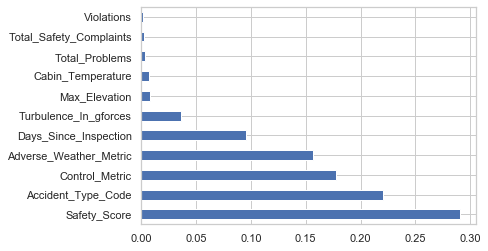

In [229]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [230]:
df4=df3.copy().drop(columns=['Violations','Total_Safety_Complaints'])

In [231]:
df4

,Safety_Score,Days_Since_Inspection,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Adverse_Weather_Metric,Total_Problems
0,49.223744,14,71.285324,0.272118,78.04,2,31335.476824,0.424352,25
1,62.465753,10,72.288058,0.423939,84.54,2,26024.711057,0.352350,29
2,63.059361,13,66.362808,0.322604,78.86,7,39269.053927,0.003364,19
3,48.082192,11,74.703737,0.337029,81.79,3,42771.499200,0.211728,10
4,26.484018,13,47.948952,0.541140,77.16,3,35509.228515,0.176883,27
...,...,...,...,...,...,...,...,...,...
9995,56.118721,8,63.445761,0.482359,78.64,5,38537.363408,0.026150,3
9996,40.365297,10,62.169553,0.421775,79.77,4,40846.916900,0.074898,9
9997,27.853881,17,69.598906,0.318277,80.37,3,33771.996300,0.168173,4
9998,56.210046,8,39.835916,0.598118,76.92,5,39820.419251,0.026381,2


In [232]:
Id=ds_test['Accident_ID']

In [233]:
ds_test=ds_test.copy().drop(columns=['Accident_ID','Violations','Total_Safety_Complaints'])

In [234]:
ds_test

,Safety_Score,Days_Since_Inspection,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Adverse_Weather_Metric,Total_Problems
0,19.497717,16,72.151322,0.388959,78.32,4,37949.724386,0.069692,8
1,58.173516,15,64.585232,0.250841,78.60,7,30194.805567,0.002777,5
2,33.287671,15,64.721969,0.336669,86.96,6,17572.925484,0.004316,4
3,3.287671,21,66.362808,0.421775,80.86,3,40209.186341,0.199990,7
4,10.867580,18,56.107566,0.313228,79.22,2,35495.525408,0.483696,4
...,...,...,...,...,...,...,...,...,...
2495,68.127854,8,49.680948,0.470819,77.80,2,48251.586622,0.659387,13
2496,54.840183,9,71.194166,0.417087,79.77,6,20761.984416,0.005010,10
2497,36.712329,14,91.203282,0.313950,83.96,6,36676.100601,0.008629,12
2498,38.721461,13,73.154057,0.275003,77.38,6,24211.359510,0.006247,15


In [237]:
df5=sc_x.fit_transform(df4)
ds_test_final=sc_x.transform(ds_test)

In [238]:
X_train, X_eval, Y_train,Y_eval = train_test_split(df5, response ,test_size=0.2)

In [239]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,30,40]
min_samples_split=[5,10,15,20,30,40]
min_samples_leaf=[5,10,15,20,30,40] 

In [240]:
hyperparameter_grid_1 = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [241]:
grid_cv = RandomizedSearchCV(clf1,hyperparameter_grid_1,cv=10,n_jobs = -1,verbose = 5,scoring ='f1_weighted',n_iter=10)

In [243]:
grid_cv.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [244]:
grid_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [246]:
forestOpt =RandomForestClassifier( max_depth = 20, n_estimators = 200, min_samples_split = 15, min_samples_leaf = 10)                                   
modelOpt = forestOpt.fit(X_train,Y_train)
y_pred_1 = modelOpt.predict(X_eval)

In [273]:
# import sklearn.metrics import accuracy_score
# import sklearn import metrics
from sklearn.metrics import f1_score

In [274]:
print("Accuracy:",metrics.accuracy_score(Y_eval, y_pred_1))

Accuracy: 0.8750670241286863


In [277]:
score=100*(f1_score(Y_eval,y_pred_1,average='weighted'))

In [278]:
score

87.55440257808867

In [288]:
import xgboost
clf2=xgboost.XGBClassifier()

In [289]:

booster=['gbtree']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100,200,300,400,500]
max_depth = [5,10,15,20,30,40]
learning_rate=[0.01,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,4]
gamma=[0.0,0.2,0.5]
colsample_bytree=[0.7,0.8,0.9]
colsample_bylevel=[0.7,0.8,0.9]
colsample_bynode=[0.7,0.8,0.9]
subsample=[0.2, 0.4, 0.5, 0.6, 0.7]
reg_alpha=[0, 0.5, 1,2,3,5]
reg_lambda=[1, 1.5, 2, 3, 4.5]

In [290]:
hyperparameter_grid_2= {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score,
    'gamma':gamma,
    'colsample_bytree':colsample_bytree,
    'colsample_bylevel':colsample_bylevel,
    'colsample_bynode':colsample_bynode,
    'subsample':subsample,
    'reg_alpha':reg_alpha,
    'reg_lambda':reg_lambda
    }

In [291]:
random_cv_2 = RandomizedSearchCV(estimator=clf2,
            param_distributions=hyperparameter_grid_2,
            cv=5,
            n_iter=10,
            scoring ='f1_weighted',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [292]:
random_cv_2.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  46 out of  50 | elapsed:  2.1min remaining:   10.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'gamma': [0.0, 0.2, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                              

In [293]:
random_cv_2.best_estimator_

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=0.9, colsample_bytree=0.8, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [294]:
clf2=xgboost. XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=0.8,colsample_bynode=0.9,
       colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=2, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.5,verbosity=1)

In [297]:

clf2.fit(X_train,Y_train)

XGBClassifier(base_score=0.75, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=0.9, colsample_bytree=0.8, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=2, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [298]:

y_pred_2=clf2.predict(X_eval)

In [299]:
print("Accuracy:",metrics.accuracy_score(Y_eval, y_pred_2))

Accuracy: 0.9453083109919571


In [300]:
score_2=100*(f1_score(Y_eval,y_pred_1,average='weighted'))

In [301]:
score_2

87.55440257808867